##### Sampling from Discrete Distributions

In [58]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

**1. Choose a value for the probability parameter p in the geometric distribution and simulate 10,000 outcomes. You can experiment with a small, moderate and large value if you like.**

In [13]:
z = np.random.geometric(p=0.35, size = 10000)

**2. Simulate the 6 point distribution**

| $X$  |  1 | 2  | 3  | 4  |5   | 6  |
|---|---|---|---|---|---|---|
| $p_i$  | 7/48  | 5/48  | 1/8  | 1/16  | 1/4  | 5/16  |

**a) Using the crude/direct method**

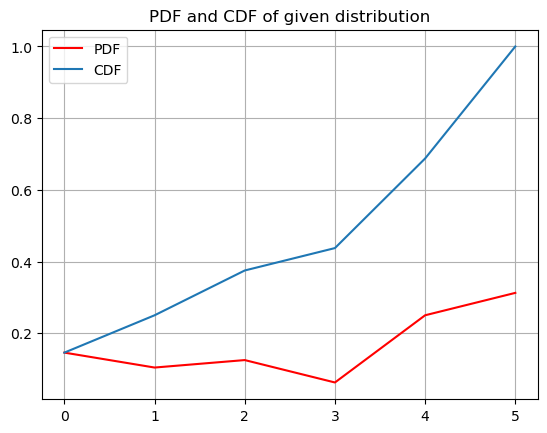

Intervals: [(0, 0.14583333333333334), (0.14583333333333334, 0.25), (0.25, 0.375), (0.375, 0.4375), (0.4375, 0.6875), (0.6875, 1.0)]


In [25]:
u = np.random.uniform(1, 10, 10000)

pdf = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]
cdf = np.cumsum(pdf)

plt.plot([i for i in range(len(pdf))], pdf, color="red", label="PDF")
plt.plot([i for i in range(len(cdf))], cdf, label="CDF")
plt.title("PDF and CDF of given distribution")
plt.grid()
plt.legend()
plt.show()

intervals = [(0, cdf[0])]+[(cdf[i-1], cdf[i]) for i in range(1, len(cdf))]
print(f"Intervals: {intervals}")

r = np.rand

Randomly generating 1000 values, mapping into discrete distribution and comparing with original

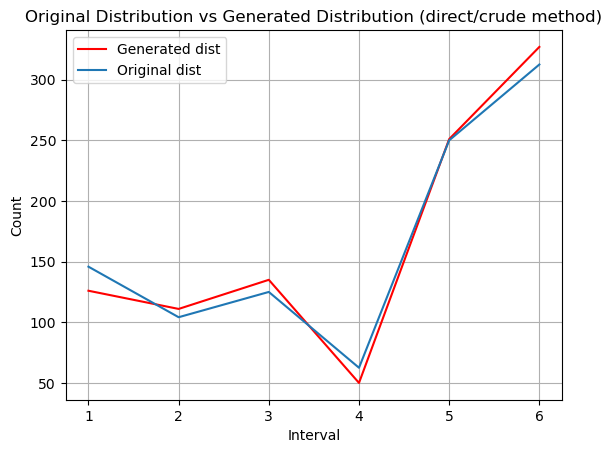

151.25925925925932


In [72]:
U = np.random.rand(1000)



def insert_into_categories(values, intervals=intervals):
    new_dist = {i: 0 for i in range(1, len(intervals)+1)}
    for value in values:
        for i, interval in enumerate(intervals): # Linear search
            if interval[0] < value and value <= interval[1]:
                new_dist[i+1] += 1
    return new_dist

rg_discrete_dist = insert_into_categories(U)

plt.plot(rg_discrete_dist.keys(), rg_discrete_dist.values(), label="Generated dist", color="r")
plt.plot([i for i in range(1, len(intervals)+1)], [i*1000 for i in pdf], label="Original dist")
plt.title("Original Distribution vs Generated Distribution (direct/crude method)")
plt.legend()
plt.grid()
plt.ylabel("Count")
plt.xlabel("Interval")
plt.show()

print(mean_squared_error(list(rg_discrete_dist.values()), [i*1000 for i in pdf]))

**b) Using the rejection method**

In [55]:
def accept_reject_method(k=6, probabilities=pdf, c=1):
    U1, U2 = np.random.random(), np.random.random()
    I = np.floor(k*U1)+1
    if U2 <= probabilities[int(I)-1]/c: return I
    else: return accept_reject_method()



6.0

Analysing results

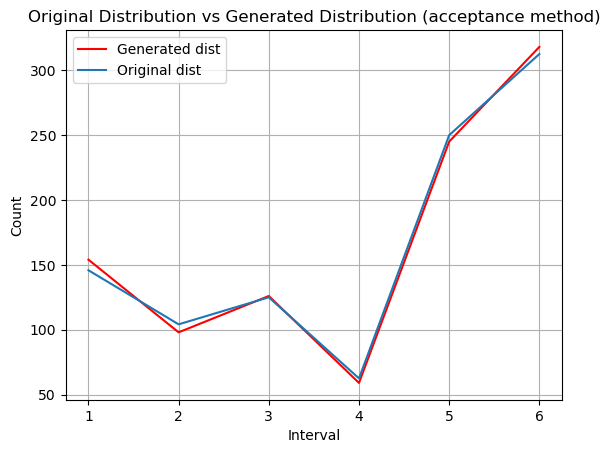

28.870370370370352


In [71]:
a_r_dist = {i: 0 for i in range(1, 7)}

vals = [accept_reject_method() for i in range(1000)]

for val in vals:
    a_r_dist[val]+=1

plt.plot(a_r_dist.keys(), a_r_dist.values(), label="Generated dist", color="r")
plt.plot([i for i in range(1, len(intervals)+1)], [i*1000 for i in pdf], label="Original dist")
plt.title("Original Distribution vs Generated Distribution (acceptance method)")
plt.legend()
plt.grid()
plt.ylabel("Count")
plt.xlabel("Interval")
plt.show()

print(mean_squared_error(list(a_r_dist.values()), [i*1000 for i in pdf]))

**c) Alias Method**

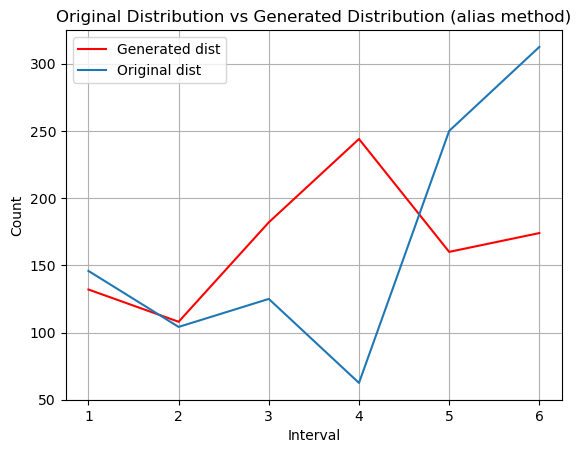

10613.25925925926


In [83]:
def gen_tables(k=6, p=pdf):
    L = [i for i in range(1, k+1)]
    F = [k*i for i in p]
    G = [i for i in range(len(F)) if F[i] >= 1]
    S = [i for i in range(len(F)) if i <= 1]
    while len(S) != 0:
        i = G[0]
        j = S[0]
        L[j] = i
        F[i] = F[i] - (1 - F[j])
        if F[i] < 1:
            G = G[1:]
            S.append(i)
        S = S[1:]
    
    return F, L

def alias_method(k=6):
    F, L = gen_tables()
    U1, U2 = np.random.random(), np.random.random()
    I = np.floor(k*U1)+1
    if U2 <= F[int(I)-1]: return I
    else: return L[int(I)-1]



alias_dist = {i: 0 for i in range(1, 7)}        


for a in [alias_method() for i in range(1000)]:
    alias_dist[a] +=1 


plt.plot(alias_dist.keys(), alias_dist.values(), label="Generated dist", color="r")
plt.plot([i for i in range(1, len(intervals)+1)], [i*1000 for i in pdf], label="Original dist")
plt.title("Original Distribution vs Generated Distribution (alias method)")
plt.legend()
plt.grid()
plt.ylabel("Count")
plt.xlabel("Interval")
plt.show()

print(mean_squared_error(list(alias_dist.values()), [i*1000 for i in pdf]))

